<a href="https://colab.research.google.com/github/nelettelouw/Car-Insurance/blob/main/Project2_Car_Insurance_Claims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Insurance Claims**
- Author: Nelette Louw

## **Data Source**
https://www.kaggle.com/datasets/sagnik1511/car-insurance-data

## **Data Description**
A company has shared it's annual car insurance data and consists of 19 features
 (as shown below) and 10 000 rows.

Each row represents the data of a customer and the feature **"Outcome"** indicates whether the customer has made an insurance claim or not (1 = Claimed, 0 = Not Claimed).

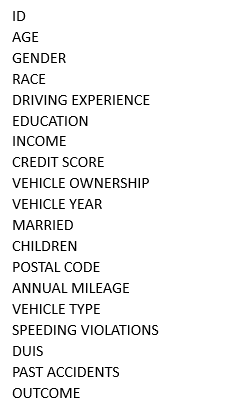


The **target** is to analyse and predict customer behaviour - whether the customer will claim against their insurance or not. The problem statement will therefor be a **binary classification** problem.



### **Import Libraries**

In [53]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatplotLib
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}
set_config(transform_output='pandas')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping


from sklearn import set_config
set_config(transform_output='pandas')

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

### **Load Data**

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
df = pd.read_csv("/content/drive/MyDrive/StudentFolders16wk20wk/CodingDojo/03-AdvancedML/Car_Insurance_Claim.csv")
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


## **Inspect Data:**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [57]:
df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 10000 rows and 19 columns.
The rows represent 10000 observations, and the columns represent 18 features and 1 target variable.


## **Data Cleaning**

1. **Unnecessary Columns**

    Both Features ```ID``` and ```POSTAL_CODE``` will be removed from the data set as these features won't directly affect the outcome.


In [58]:
df = df.drop(columns=['ID','POSTAL_CODE'])

2. **Duplicate rows**

In [59]:
print(f' There are {df.duplicated().sum()} duplicate rows in the data.')

 There are 20 duplicate rows in the data.


In [60]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)
print(f' There are now {df.duplicated().sum()} duplicate rows after duplicates were dropped.')

 There are now 0 duplicate rows after duplicates were dropped.


3. **Missing Values**

In [61]:
# Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 1914 missing values.


In [62]:
# Check for missing values per feature
df.isna().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           962
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
ANNUAL_MILEAGE         952
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

There are missing values in ```CREDIT_SCORE``` as well in ```ANNUAL_MILEAGE```. Both are numeric values.

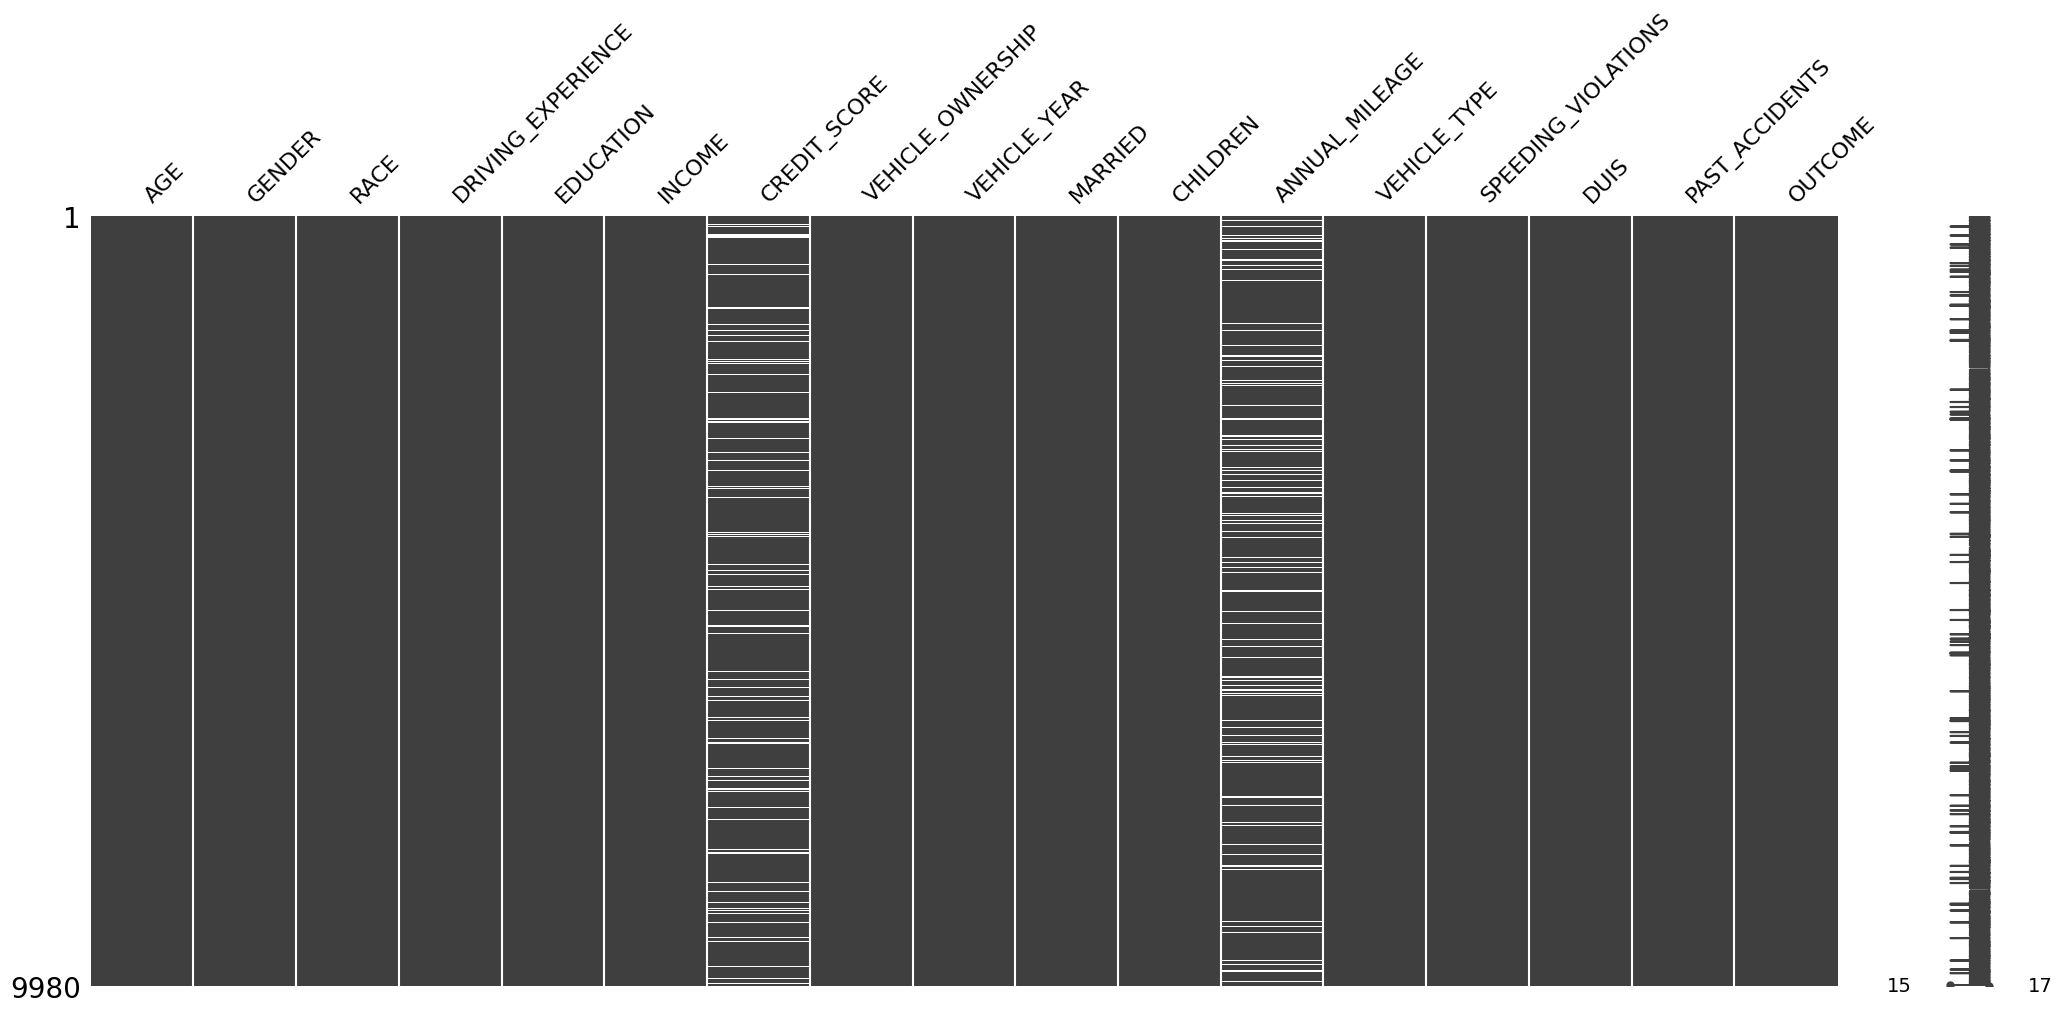

In [63]:
import missingno as msno
msno.matrix(df);

The spread of missing values can be seen in the matrix. There also seems to be no correlation between the mssing values in the ```CREDIT_SCORE``` and ```ANNUAL_MILEAGE``` columns.

In [64]:
# To impute missing values with the mean, we will first check if the mean is not influenced by outliers.
df[['CREDIT_SCORE','ANNUAL_MILEAGE']].describe()

,CREDIT_SCORE,ANNUAL_MILEAGE
count,9018.000000,9028.000000
mean,0.515813,11694.395215
std,0.137688,2818.615350
min,0.053358,2000.000000
25%,0.417191,10000.000000
50%,0.525033,12000.000000
75%,0.618312,14000.000000
max,0.960819,22000.000000


The mean for both numerical colums seems not to be influenced by number inconsistencies or outliers.

In [65]:
# Impute missing values in numerical columns with the mean
df['CREDIT_SCORE'].fillna(df['CREDIT_SCORE'].mean().round(1),inplace = True)
df['ANNUAL_MILEAGE'].fillna(df['ANNUAL_MILEAGE'].mean().round(1),inplace = True)

# Check if there's stil missing values after imputation
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


3. **Data Inconsistencies (Categorical)**

In [66]:
string_cols = df.select_dtypes("object").columns
string_cols

for col in string_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  print('\n')

Value Counts for AGE
26-39    3061
40-64    2930
16-25    1999
65+      1990
Name: AGE, dtype: int64


Value Counts for GENDER
female    4998
male      4982
Name: GENDER, dtype: int64


Value Counts for RACE
majority    8992
minority     988
Name: RACE, dtype: int64


Value Counts for DRIVING_EXPERIENCE
0-9y      3513
10-19y    3297
20-29y    2118
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64


Value Counts for EDUCATION
high school    4148
university     3925
none           1907
Name: EDUCATION, dtype: int64


Value Counts for INCOME
upper class      4334
middle class     2137
poverty          1798
working class    1711
Name: INCOME, dtype: int64


Value Counts for VEHICLE_YEAR
before 2015    6948
after 2015     3032
Name: VEHICLE_YEAR, dtype: int64


Value Counts for VEHICLE_TYPE
sedan         9503
sports car     477
Name: VEHICLE_TYPE, dtype: int64




There seems to be no data inconsistencies in the categorical values.

4. **Data Inconsistencies (Numeric)**

In [67]:
df.describe(include = 'number')

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000,9980.000000
mean,0.514289,0.697796,0.498998,0.689479,11694.395671,1.485271,0.239679,1.058016,0.312425
std,0.130966,0.459236,0.500024,0.462730,2680.797579,2.243313,0.555443,1.653446,0.463505
min,0.053358,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000
25%,0.431222,0.000000,0.000000,0.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
50%,0.504622,1.000000,0.000000,1.000000,11694.400000,0.000000,0.000000,0.000000,0.000000
75%,0.607780,1.000000,1.000000,1.000000,13000.000000,2.000000,0.000000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,22000.000000,22.000000,6.000000,15.000000,1.000000


No numeric data inconsistencies are detected.

## **Exploratory Data Analysis**

**Univariate Visualizations for all Categorical Features**

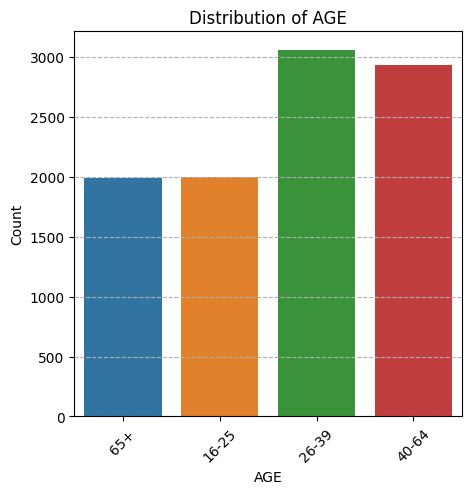

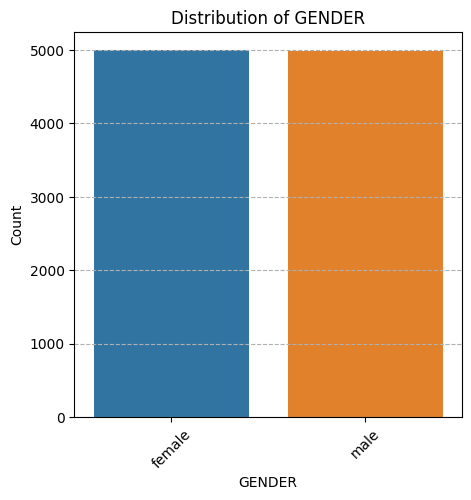

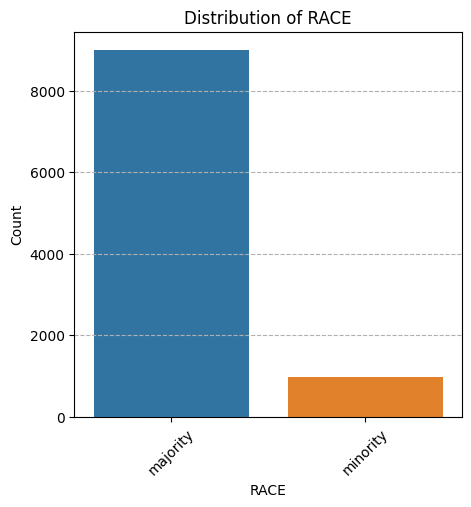

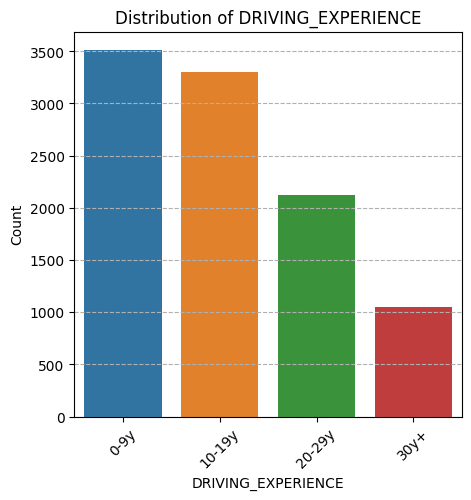

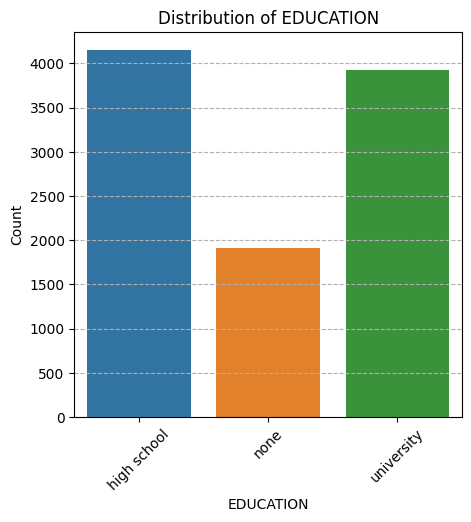

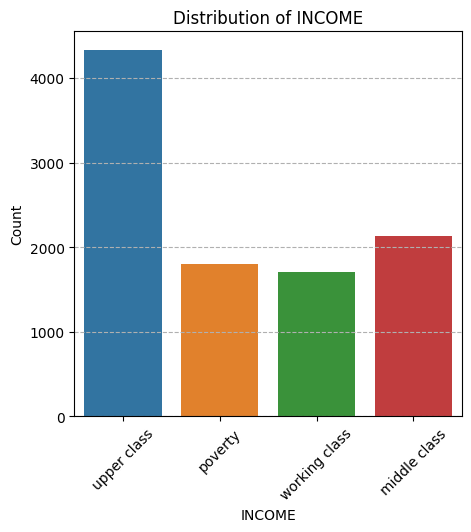

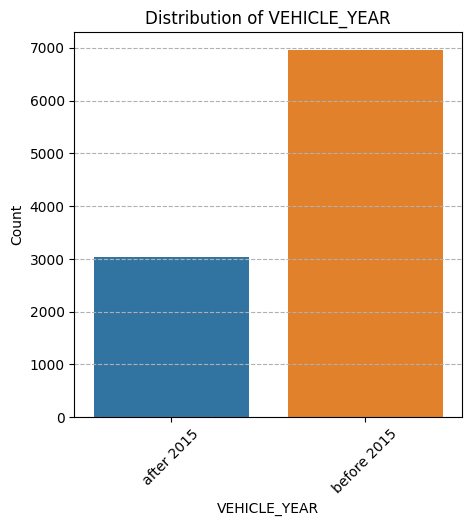

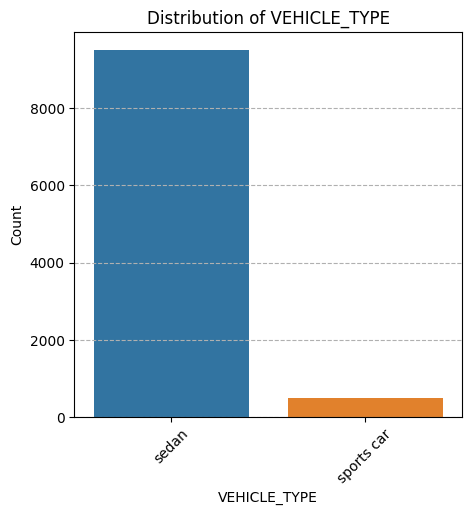

In [68]:
import seaborn as sns

# Categorical Variables
for col in string_cols:
    plt.figure(figsize=(5, 5))
    sns.countplot(data=df,x=col)
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--')
    plt.show()

**Univariate Visualizations for all Numeric Features**

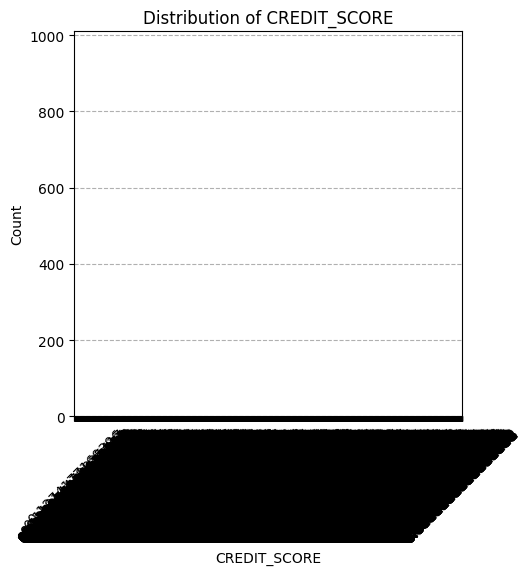

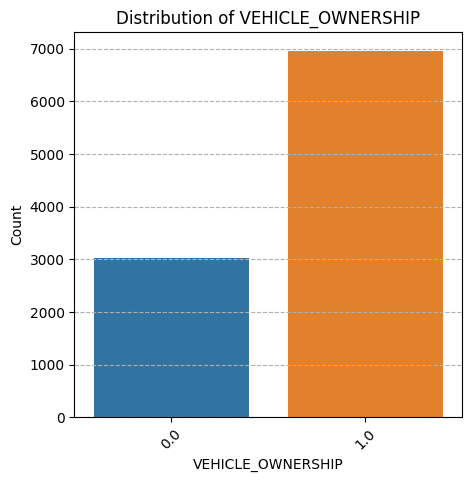

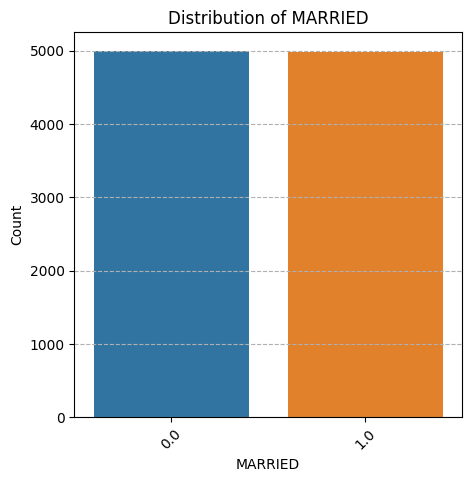

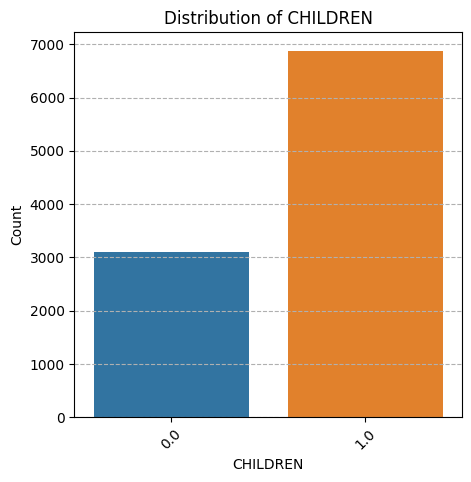

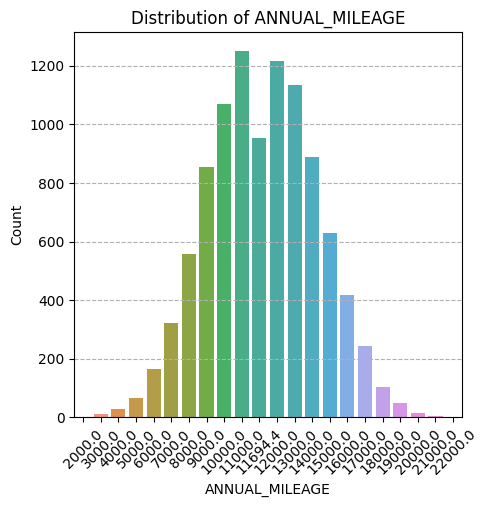

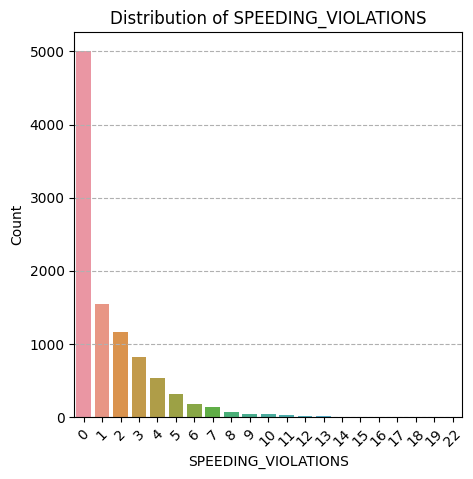

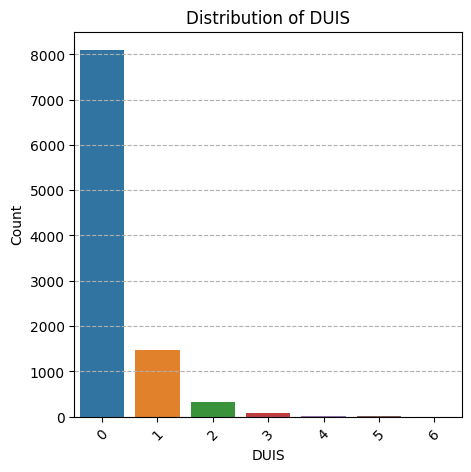

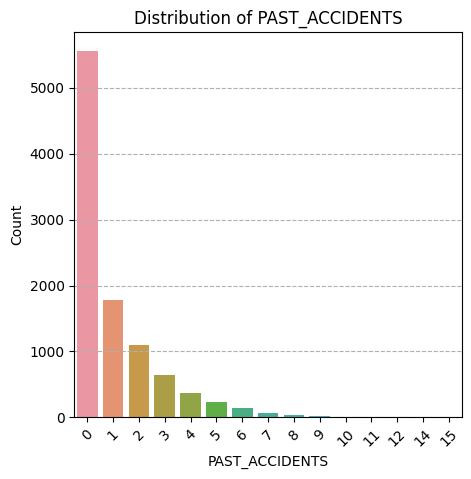

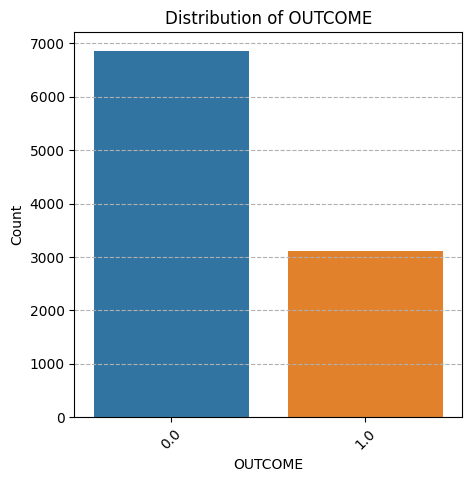

In [69]:
# Numeric Features
num_cols = df.select_dtypes('number').columns
num_cols

for num in num_cols:
    plt.figure(figsize=(5, 5))
    sns.countplot(data=df,x=num)
    plt.title(f'Distribution of {num}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--')
    plt.show()

**Heatmap/Correlation Visualization**

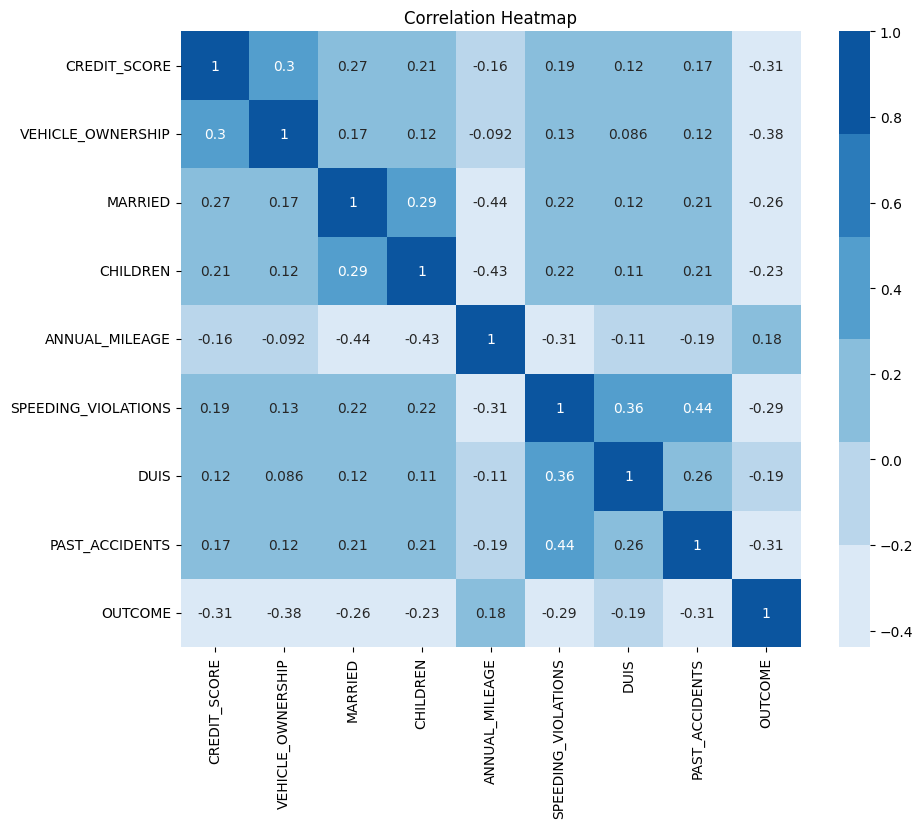

In [70]:
# Correlation Heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
colormap = sns.color_palette("Blues")
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot = True,cmap=colormap);

A heatmap is a two-dimensional representation of data in which correlations are represented by colours and values. The amount of correlation (measure of dependence) between variables ranges from -1 to +1. The closer to 1 the correlation is, the more positively correlated they are.


**Observations:**
- The feature with the highest correlation to our target (```OUTCOME```) is ```ANNUAL_MILEAGE``` (only 0.18) .
- ```DUIS``` (0.36) and ```PAST_ACCIDENTS``` (0.44) are strongly correlated to ```SPEEDING_VIOLATIONS```.
- A correlation also exists between ```CREDIT_SCORE``` and ```VEHICLE_OWNERSHIP``` (0.30).
- The correlation between ```CHILDREN``` and ```MARRIED``` is also strong but not so relevant to target.

**Multivariate Visualizations**

Strong correlations identified in the heatmap will be further explored through multivariate visualizations.

Text(0.5, 1.0, 'Comparison between Speeding Violations and Past Accidents')

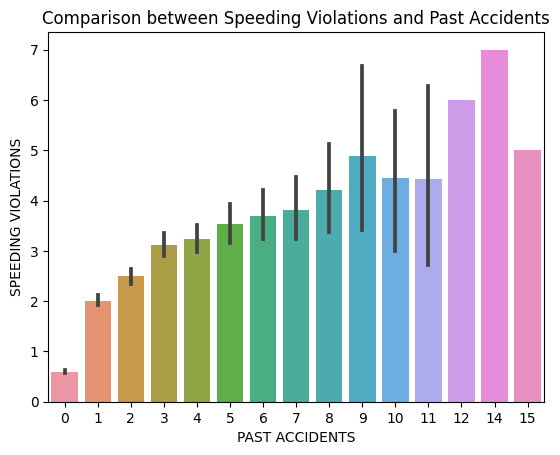

In [71]:
# Barplot
sns.barplot(data=df, x='PAST_ACCIDENTS', y='SPEEDING_VIOLATIONS')

plt.xlabel("PAST ACCIDENTS")
plt.ylabel("SPEEDING VIOLATIONS")
plt.title("Comparison between Speeding Violations and Past Accidents")

Text(0.5, 1.0, 'Comparison between Speeding Violations and Duis')

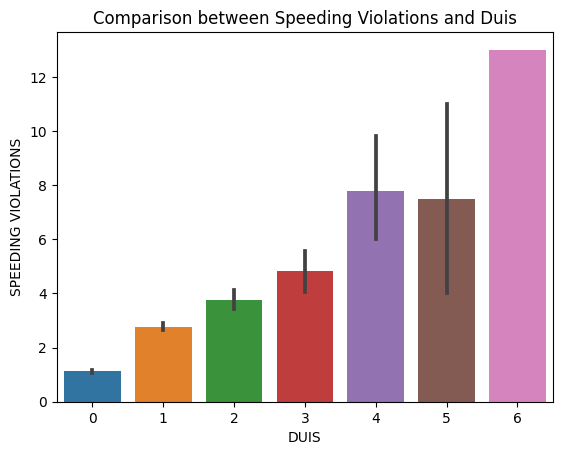

In [72]:
# Barplot
sns.barplot(data=df, x='DUIS', y='SPEEDING_VIOLATIONS')

plt.xlabel("DUIS")
plt.ylabel("SPEEDING VIOLATIONS")
plt.title("Comparison between Speeding Violations and Duis")

Text(0, 0.5, 'CREDIT SCORE')

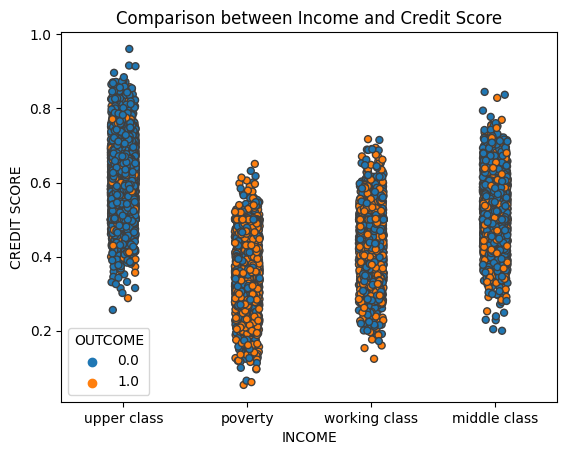

In [73]:
sns.stripplot(data=df, x="INCOME", y="CREDIT_SCORE", hue="OUTCOME", linewidth=1)
plt.title("Comparison between Income and Credit Score")
plt.xlabel("INCOME")
plt.ylabel("CREDIT SCORE")

Customers in the ```poverty income group``` tend to have ```lower credit scores```. It also shows that these customers have a higher concentration of insurance claims.

**Stakeholder visualizations**

Text(0, 0.5, 'Number of Claims')

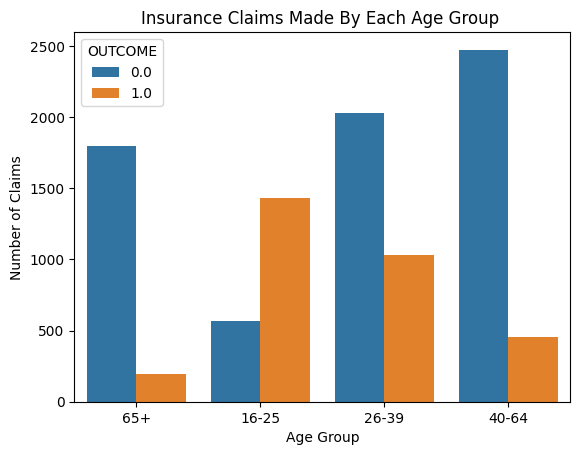

In [74]:
# Countplot
sns.countplot(df, x="AGE", hue="OUTCOME")

plt.title("Insurance Claims Made By Each Age Group ")
plt.xlabel("Age Group")
plt.ylabel("Number of Claims")

More ```Insurance claims``` are made by the ```Age Group``` 16-25 year than other age groups.

Text(0, 0.5, 'Number of Claims')

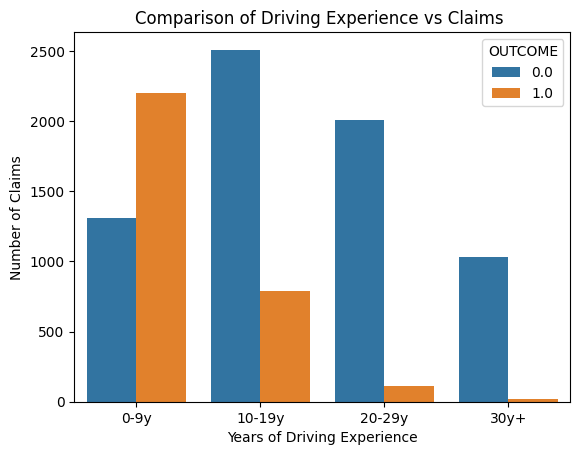

In [75]:
# Countplot
sns.countplot(df, x="DRIVING_EXPERIENCE", hue="OUTCOME")

plt.title("Comparison of Driving Experience vs Claims ")
plt.xlabel("Years of Driving Experience")
plt.ylabel("Number of Claims")

Claims made by customers gets lower with the more ```Years of Driving Experience``` a customer has. Customers who fall in the bracket ```10-19 years of Driving Experience``` shows to make the least claims overall.

Text(0.5, 1.0, 'Comparison between Speeding Violations and Past Accidents')

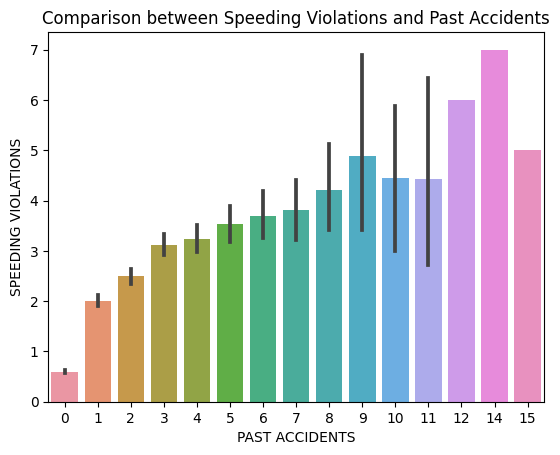

In [76]:
# Barplot
sns.barplot(data=df, x='PAST_ACCIDENTS', y='SPEEDING_VIOLATIONS')

plt.xlabel("PAST ACCIDENTS")
plt.ylabel("SPEEDING VIOLATIONS")
plt.title("Comparison between Speeding Violations and Past Accidents")

When ```Past Accidents``` and ```Speeding Violations``` are compared, it shows that the more ```Speeding Violations``` customers have, the more likely it is that they also have been involved in ```Past Accidents```.


## **Preprocessing**

**Create a Copy of Data**

In [77]:
df_ml = df.copy()

**Check Class Balance**

In [78]:
# Check how many samples of each class are present
df_ml['OUTCOME'].value_counts(normalize=False)

0.0    6862
1.0    3118
Name: OUTCOME, dtype: int64

**Split the Data**

In [79]:
# Define features (X) and target (y)
target = 'OUTCOME'
X = df_ml.drop(columns = target)
y = df_ml[target]

In [80]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

**Check Class Balance**

In [81]:
# Check how many samples of each class are present for train
y_train.value_counts(normalize=True)

0.0    0.687508
1.0    0.312492
Name: OUTCOME, dtype: float64

In [82]:
y_test.value_counts(normalize=True)

0.0    0.687776
1.0    0.312224
Name: OUTCOME, dtype: float64

**Numeric Transformation**

In [83]:
# We will use a mean imputer to impute missing values for the numeric columns
# Transformers
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Pipeline
num_pipeline = make_pipeline(mean_imputer, scaler)

# Selector
num_selector = make_column_selector(dtype_include= 'number')

# Tuple
numeric_tuple = (num_pipeline, num_selector)

In [84]:
num_selector(X_train)

['CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'MARRIED',
 'CHILDREN',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS']

**Ordinal Transformation**

In [85]:
# Ordered Category Lists
ordinal_cols = ['EDUCATION', 'INCOME', 'VEHICLE_YEAR']

education_list = ['high school','university']
income_list = ['poverty', 'working class', 'middle class ', 'upper class']
vehicle_year_list = ['before 2015', 'after 2015']

# Transformers
ord = OrdinalEncoder(categories=[education_list, income_list,vehicle_year_list],handle_unknown='use_encoded_value',unknown_value = -1)

# We will use a most frequent imputer to impute missing values for the ordinal columns
freq_imputer = SimpleImputer(strategy='most_frequent')

# We have more than 2 ordinal values for each column so using scaler
scaler2 = StandardScaler()

# Pipeline
ord_pipeline = make_pipeline(freq_imputer, ord, scaler2)

# Tuple
ordinal_tuple = (ord_pipeline, ordinal_cols)

**Nominal Transformation**

In [86]:
# Defining list of nominal features
ohe_cols = X_train.select_dtypes('object').drop(columns=ordinal_cols).columns
ohe_cols

# Instantiate OneHotEncoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Instantiate the pipeline
ohe_pipeline = make_pipeline(ohe_encoder)

# Tuple
ohe_tuple = (ohe_pipeline, ohe_cols)


In [87]:
# Instantiate the make column transformer
preprocessor = make_column_transformer(numeric_tuple,
                                       ordinal_tuple,
                                       ohe_tuple,
                                       remainder='drop')
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7bce1d043490>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[[...
                                                                             ['before '
                                                                              '2015',
                                                                              'after '
                                                                              '2015']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['EDUCATION', 'INCOME', 'VEHICLE_YEAR']),
                                ('pipeline-3',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'VEHICLE_TYPE'], dtype='object'))])

## **Modelling**

In [88]:
# Create a function to display the classification metrics of a model
def classification_metrics(model, X_test, y_test, label='Test Data',
                             figsize=(15,5), normalize='true',
                             cmap='Greens', thresh=.5):

    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get the predictions
    y_proba = model.predict_proba(X_test)
    y_pred = [1 if x[1] > thresh else 0 for x in y_proba]

    ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                normalize=normalize, cmap=cmap,
                ax=axes[0])

    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.show()

**1. KNN Model**

In [89]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
## Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bce1d043490>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal...
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['EDUCATION', 'INCOME',
                                                   'VEHICLE_YEAR']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'VEHICLE_TYPE'], dtype='object'))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

 - **KNN Model Evaluation**


In [90]:
# Save the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
# Save the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

In [91]:
# print the classification reports
labels = ['0','1']
print('Train Report')
print(classification_report(y_train, knn_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, knn_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      5146
           1       0.79      0.75      0.77      2339

    accuracy                           0.86      7485
   macro avg       0.84      0.83      0.83      7485
weighted avg       0.86      0.86      0.86      7485

Test Report
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1716
           1       0.73      0.71      0.72       779

    accuracy                           0.83      2495
   macro avg       0.80      0.79      0.80      2495
weighted avg       0.83      0.83      0.83      2495



In [92]:
# Classification Metrics
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay,
                             PrecisionRecallDisplay, RocCurveDisplay,
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

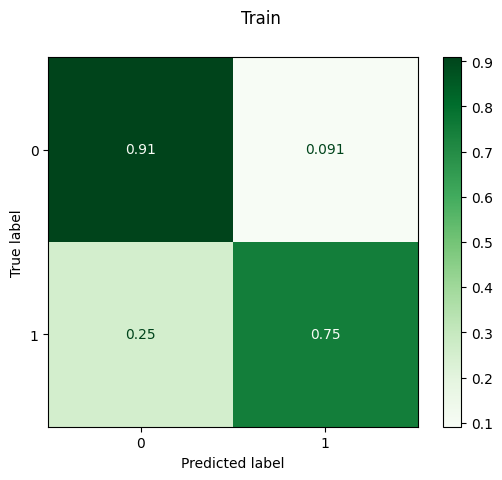

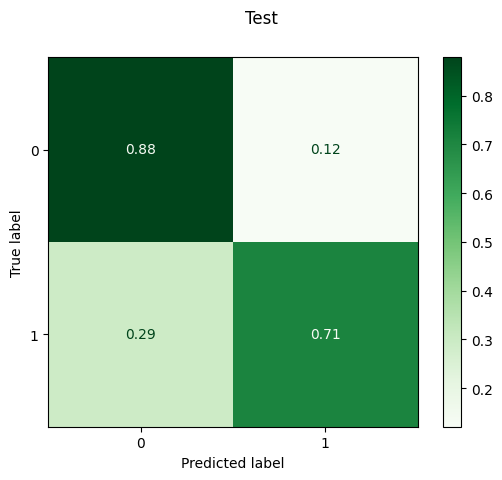

In [93]:
# Create Confusion Matrices
ConfusionMatrixDisplay.from_predictions(y_train, knn_train_preds,
               normalize='true', display_labels=labels, cmap='Greens')
plt.suptitle('Train');



ConfusionMatrixDisplay.from_predictions(y_test, knn_test_preds,
               normalize='true', display_labels=labels, cmap='Greens')
plt.suptitle('Test');

 - **Tune the Hyperparameters**

In [94]:
# Display the hyperparameters.
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7bce1d043490>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categories=[[...
                                                                                ['before '
                              

In [95]:
# Create a dictionary of parameters
params = {'kneighborsclassifier__n_neighbors': range(1,15),
          'kneighborsclassifier__weights': ['distance','uniform']}

In [96]:
# Tune hyperparameters with GridSearchCV
knn_gs = GridSearchCV(knn_pipe, params)
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7bce1d043490>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='mos...
                                                                        ('pipeline-3',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'VEHICLE_TYPE'], dtype='object'))])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 15),
                         'kneighborsclassifier__weights': ['distance',
                                                           'uniform']})

In [97]:
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 11,
 'kneighborsclassifier__weights': 'uniform'}

In [98]:
knn_gs.best_score_

0.8172344689378758

In [99]:
best_knn = knn_gs.best_estimator_

In [100]:
# Check the best parameter
# Instantiate and fit GridSearchCV
train_preds = best_knn.predict(X_train)
test_preds = best_knn.predict(X_test)

In [101]:
print('Train\n', classification_report(y_train, train_preds))
print('Test\n', classification_report(y_test, test_preds))

Train
               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      5146
         1.0       0.76      0.72      0.74      2339

    accuracy                           0.84      7485
   macro avg       0.82      0.81      0.81      7485
weighted avg       0.84      0.84      0.84      7485

Test
               precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1716
         1.0       0.74      0.71      0.72       779

    accuracy                           0.83      2495
   macro avg       0.80      0.80      0.80      2495
weighted avg       0.83      0.83      0.83      2495



Text(0.5, 1.0, 'Test CM')

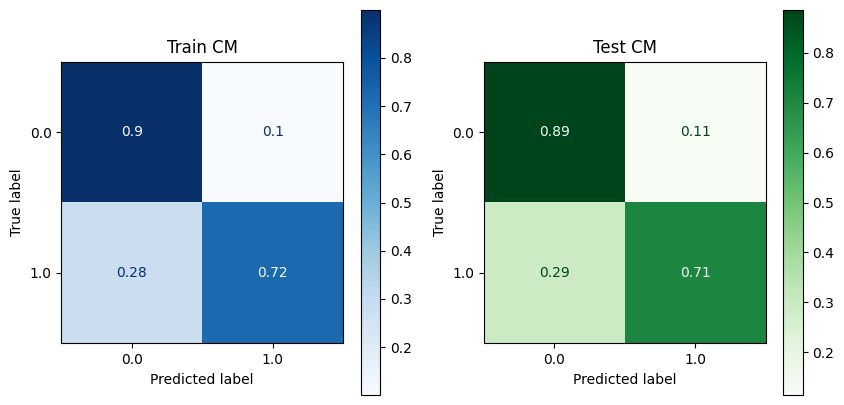

In [102]:
# Check the class balance again to help us choose a metric
# Display the test and training Confusion Matrix
fig, axes = plt.subplots(ncols=2, figsize=(10,5))

ConfusionMatrixDisplay.from_predictions(y_train, train_preds,
                                        ax=axes[0], cmap='Blues',normalize='true')

axes[0].set_title('Train CM')
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,
                                        ax=axes[1], cmap='Greens',normalize='true')

axes[1].set_title('Test CM')

After hypertuning the KNN model, only the test scores improved slightly.

**2. Logistic Regression Model**

In [103]:
lr = LogisticRegression(random_state =42)
lr_pipe = make_pipeline(preprocessor, lr)
lr_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bce1d043490>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal...
                                                                                  unknown_value=-1)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['EDUCATION', 'INCOME',
                                                   'VEHICLE_YEAR']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'VEHICLE_TYPE'], dtype='object'))])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [104]:
# Save the model's predictions for the train dataset
lr_train_preds = lr_pipe.predict(X_train)
# Save the model's predictions for the test dataset
lr_test_preds = lr_pipe.predict(X_test)

In [105]:
# print the classification reports
print('Train Report')
print(classification_report(y_train, lr_train_preds))

print('Test Report')
print(classification_report(y_test, lr_test_preds))

Train Report
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      5146
         1.0       0.76      0.71      0.73      2339

    accuracy                           0.84      7485
   macro avg       0.81      0.80      0.81      7485
weighted avg       0.84      0.84      0.84      7485

Test Report
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      1716
         1.0       0.78      0.76      0.77       779

    accuracy                           0.86      2495
   macro avg       0.83      0.83      0.83      2495
weighted avg       0.86      0.86      0.86      2495



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81      5146
         1.0       0.59      0.91      0.71      2339

    accuracy                           0.77      7485
   macro avg       0.77      0.81      0.76      7485
weighted avg       0.83      0.77      0.78      7485



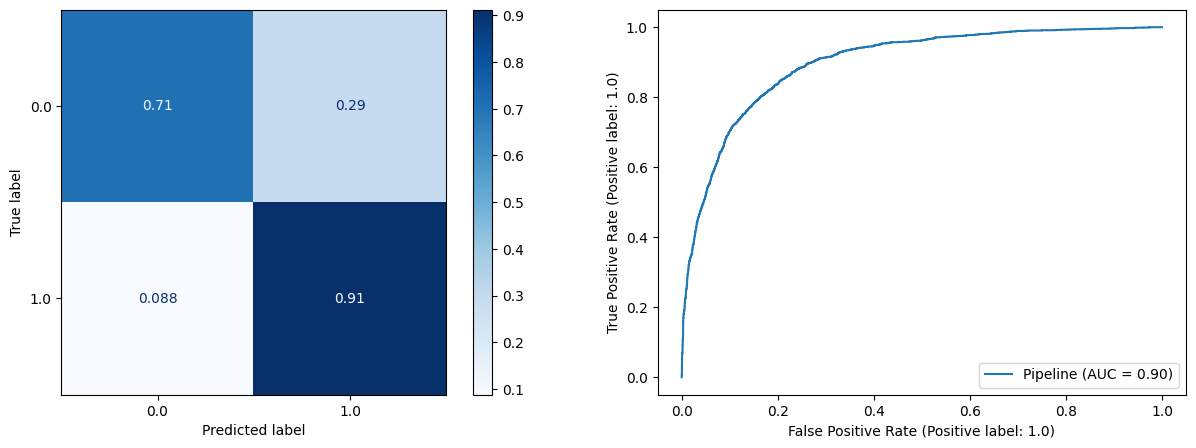

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81      1716
         1.0       0.59      0.90      0.71       779

    accuracy                           0.77      2495
   macro avg       0.76      0.81      0.76      2495
weighted avg       0.83      0.77      0.78      2495



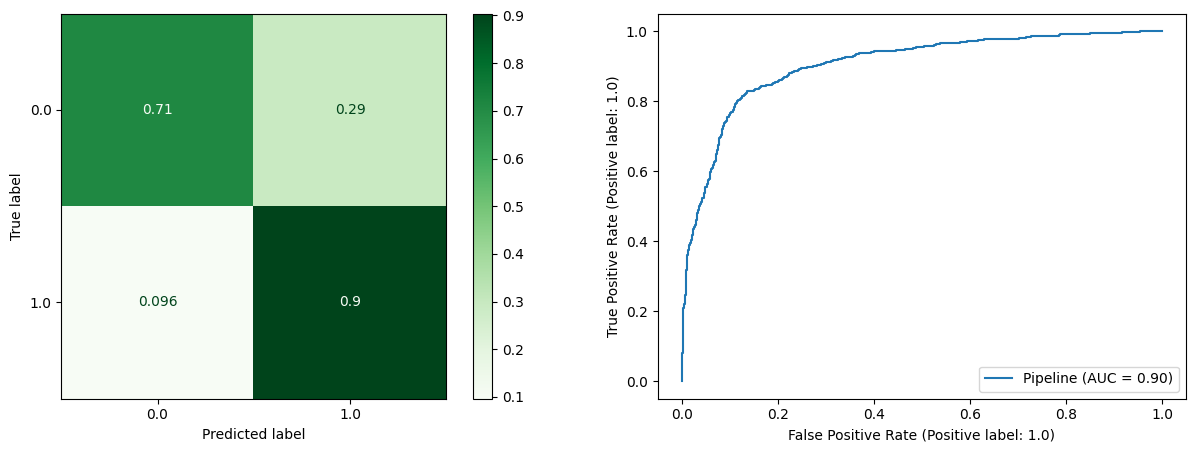

In [106]:
# Use the function twice to evaluate our model on training AND test data
classification_metrics(lr_pipe, X_train,y_train, thresh=.2,cmap='Blues', label='Training Data')
classification_metrics(lr_pipe, X_test,y_test, thresh=.2, cmap='Greens', label='Test Data')

In [107]:
# Display the hyperparameters.
lr_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7bce1d043490>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categories=[[...
                                                                                ['before '
                              

In [108]:
# Create a dictionary of parameters
params = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [109]:
lr_gs = GridSearchCV(lr_pipe, params)
lr_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7bce1d043490>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='mos...
                                                                          'INCOME',
                                                                          'VEHICLE_YEAR']),
                                                                        ('pipeline-3',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'VEHICLE_TYPE'], dtype='object'))])),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000]})

In [110]:
lr_gs.best_params_

{'logisticregression__C': 10}

In [111]:
best_lr = lr_gs.best_estimator_

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81      5146
         1.0       0.59      0.91      0.71      2339

    accuracy                           0.77      7485
   macro avg       0.77      0.81      0.76      7485
weighted avg       0.83      0.77      0.78      7485



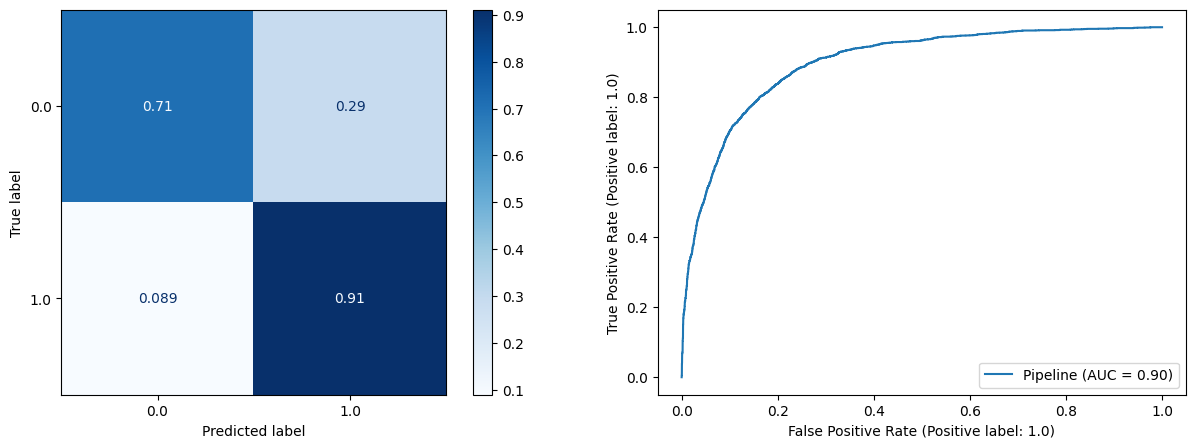

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.81      1716
         1.0       0.59      0.91      0.71       779

    accuracy                           0.77      2495
   macro avg       0.77      0.81      0.76      2495
weighted avg       0.83      0.77      0.78      2495



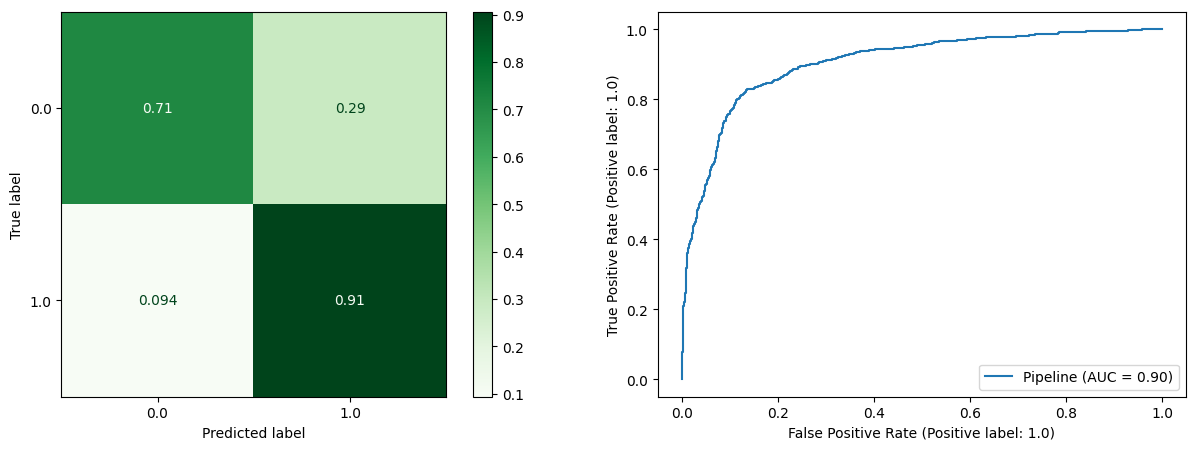

In [112]:
# Use the function twice to evaluate our model on training AND test data
classification_metrics(best_lr, X_train,y_train, thresh=.2,
                         cmap='Blues', label='Training Data')
classification_metrics(best_lr, X_test,y_test, thresh=.2,
                         cmap='Greens',label='Test Data')

**3. Logistic Regression with PCA**

In [114]:
pca = PCA()
lr_pca_pipe = make_pipeline(preprocessor, pca, lr)
lr_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7bce1d043490>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal...
                                                                                  unknown_value=-1)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['EDUCATION', 'INCOME',
                                                   'VEHICLE_YEAR']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'VEHICLE_TYPE'], dtype='object'))])),
                ('pca', PCA()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [119]:
# Predictions
lr_pca_train_preds = lr_pca_pipe.predict(X_train)
lr_pca_test_preds  = lr_pca_pipe.predict(X_test)

In [121]:
# Reports
print('Train')
print(classification_report(y_train, lr_pca_train_preds))
print('Test')
print(classification_report(y_test, lr_pca_test_preds))

Train
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      5146
         1.0       0.76      0.71      0.73      2339

    accuracy                           0.84      7485
   macro avg       0.81      0.80      0.81      7485
weighted avg       0.84      0.84      0.84      7485

Test
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      1716
         1.0       0.78      0.76      0.77       779

    accuracy                           0.86      2495
   macro avg       0.83      0.83      0.83      2495
weighted avg       0.86      0.86      0.86      2495



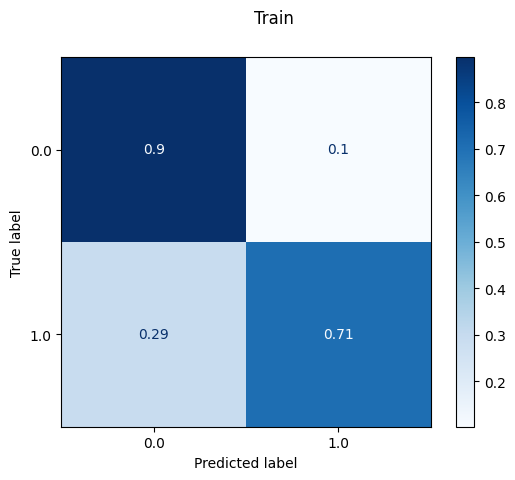

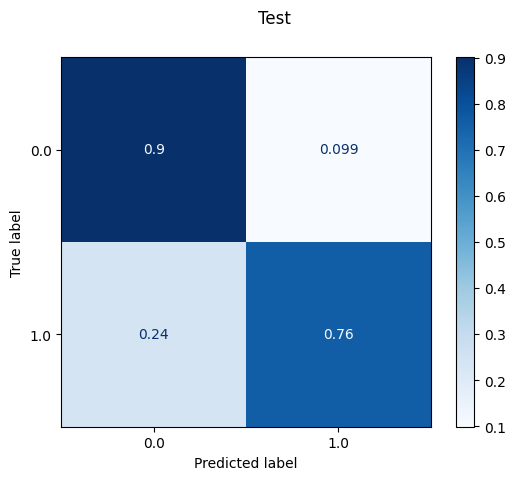

In [123]:

ConfusionMatrixDisplay.from_predictions(y_train, lr_pca_train_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Train');

ConfusionMatrixDisplay.from_predictions(y_test, lr_pca_test_preds,
               normalize='true', cmap='Blues')
plt.suptitle('Test');

The Production model that I would choose is the Logistic Regression with PCA due to the fact that it has the highest accuracy rate of 86%. PCA will also be an advantage when dealing with big data sets.